In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_train = pd.read_csv('/content/AAPL_train.csv')
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.264984,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,129.850830,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.479858,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.761627,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,130.881638,105158200


No handles with labels found to put in legend.


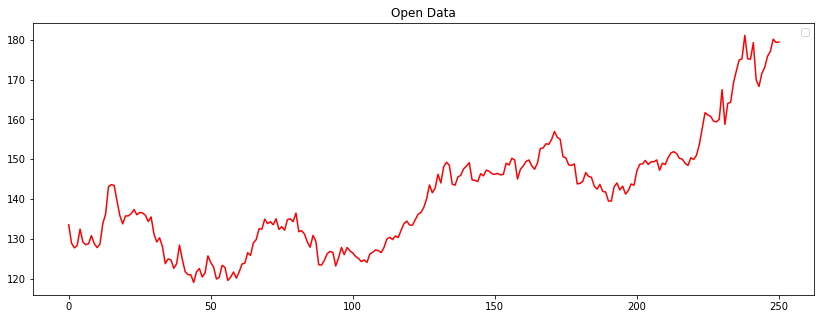

In [3]:
plt.figure(figsize=(14,5))
plt.plot(data_train.iloc[:,1:2], color='red')
plt.title('Open Data')
plt.legend()
plt.show()

In [4]:
training_set = data_train.iloc[:,1:2].values
training_set[0:10]

array([[133.520004],
       [128.889999],
       [127.720001],
       [128.360001],
       [132.429993],
       [129.190002],
       [128.5     ],
       [128.759995],
       [130.800003],
       [128.779999]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train=[]
y_train=[]
for i in range(60,251):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
data_test = pd.read_csv('/content/AAPL_test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

In [9]:
data_total=pd.concat([data_train['Open'], data_test['Open']], axis=0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [11]:
model1 = Sequential()
model1.add(LSTM(units=60, activation = 'sigmoid', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model1.add(LSTM(units=60, activation = 'sigmoid', return_sequences=True))
model1.add(LSTM(units=60, activation = 'sigmoid', return_sequences=True))
model1.add(LSTM(units=60, activation = 'sigmoid'))
model1.add(Dense(units=1))

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 lstm_2 (LSTM)               (None, 60, 60)            29040     
                                                                 
 lstm_3 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 102,061
Trainable params: 102,061
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
history1 = model1.fit(X_train,y_train, epochs = 100,batch_size=32, verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 124ms/step - loss: 0.0576
Epoch 2/100
6/6 [==============================] - 1s 130ms/step - loss: 0.0570
Epoch 3/100
6/6 [==============================] - 1s 130ms/step - loss: 0.0529
Epoch 4/100
6/6 [==============================] - 1s 128ms/step - loss: 0.0516
Epoch 5/100
6/6 [==============================] - 1s 126ms/step - loss: 0.0530
Epoch 6/100
6/6 [==============================] - 1s 122ms/step - loss: 0.0521
Epoch 7/100
6/6 [==============================] - 1s 127ms/step - loss: 0.0516
Epoch 8/100
6/6 [==============================] - 1s 127ms/step - loss: 0.0543
Epoch 9/100
6/6 [==============================] - 1s 122ms/step - loss: 0.0525
Epoch 10/100
6/6 [==============================] - 1s 124ms/step - loss: 0.0531
Epoch 11/100
6/6 [==============================] - 1s 125ms/step - loss: 0.0542
Epoch 12/100
6/6 [==============================] - 1s 125ms/step - loss: 0.0572
Epoch 13/100
6/6 [===================

In [15]:
predicted_stock_price_1 = model1.predict(X_test)
predicted_stock_price_1 = sc.inverse_transform(predicted_stock_price_1)

In [16]:
model2 = Sequential()
model2.add(LSTM(units=60, activation = 'relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model2.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model2.add(LSTM(units=60, activation = 'relu'))
model2.add(Dense(units=1))

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 60)            14880     
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            29040     
                                                                 
 lstm_6 (LSTM)               (None, 60, 60)            29040     
                                                                 
 lstm_7 (LSTM)               (None, 60)                29040     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 102,061
Trainable params: 102,061
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
history2 = model2.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
6/6 [==============================] - 5s 127ms/step - loss: 0.2093
Epoch 2/100
6/6 [==============================] - 1s 125ms/step - loss: 0.1702
Epoch 3/100
6/6 [==============================] - 1s 126ms/step - loss: 0.0967
Epoch 4/100
6/6 [==============================] - 1s 229ms/step - loss: 0.0328
Epoch 5/100
6/6 [==============================] - 1s 126ms/step - loss: 0.0312
Epoch 6/100
6/6 [==============================] - 1s 125ms/step - loss: 0.0284
Epoch 7/100
6/6 [==============================] - 1s 130ms/step - loss: 0.0206
Epoch 8/100
6/6 [==============================] - 1s 123ms/step - loss: 0.0176
Epoch 9/100
6/6 [==============================] - 1s 121ms/step - loss: 0.0141
Epoch 10/100
6/6 [==============================] - 1s 127ms/step - loss: 0.0130
Epoch 11/100
6/6 [==============================] - 1s 131ms/step - loss: 0.0118
Epoch 12/100
6/6 [==============================] - 1s 127ms/step - loss: 0.0124
Epoch 13/100
6/6 [===================

In [20]:
predicted_stock_price_2 = model2.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

In [21]:
model3 = Sequential()
model3.add(LSTM(units=60, activation = 'relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model3.add(Dropout(0.5))
model3.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(units=60, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))

In [22]:
model3.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
history3 = model3.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 138ms/step - loss: 0.2086
Epoch 2/100
6/6 [==============================] - 1s 133ms/step - loss: 0.1548
Epoch 3/100
6/6 [==============================] - 1s 133ms/step - loss: 0.0678
Epoch 4/100
6/6 [==============================] - 1s 134ms/step - loss: 0.0424
Epoch 5/100
6/6 [==============================] - 1s 133ms/step - loss: 0.0468
Epoch 6/100
6/6 [==============================] - 1s 132ms/step - loss: 0.0381
Epoch 7/100
6/6 [==============================] - 1s 130ms/step - loss: 0.0307
Epoch 8/100
6/6 [==============================] - 1s 132ms/step - loss: 0.0287
Epoch 9/100
6/6 [==============================] - 1s 135ms/step - loss: 0.0235
Epoch 10/100
6/6 [==============================] - 1s 135ms/step - loss: 0.0200
Epoch 11/100
6/6 [==============================] - 1s 134ms/step - loss: 0.0243
Epoch 12/100
6/6 [==============================] - 1s 131ms/step - loss: 0.0260
Epoch 13/100
6/6 [===================

In [24]:
predicted_stock_price_3 = model3.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

In [25]:
model4 = Sequential()
model4.add(LSTM(units=60, activation = 'sigmoid', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model4.add(Dropout(0.5))
model4.add(LSTM(units=60, activation = 'sigmoid', return_sequences=True))
model4.add(Dropout(0.5))
model4.add(LSTM(units=60, activation = 'sigmoid', return_sequences=True))
model4.add(Dropout(0.5))
model4.add(LSTM(units=60, activation = 'sigmoid'))
model4.add(Dropout(0.5))
model4.add(Dense(units=1))

In [26]:
model4.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
history4 = model4.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 133ms/step - loss: 0.3905
Epoch 2/100
6/6 [==============================] - 1s 128ms/step - loss: 0.3072
Epoch 3/100
6/6 [==============================] - 1s 129ms/step - loss: 0.2507
Epoch 4/100
6/6 [==============================] - 1s 134ms/step - loss: 0.2143
Epoch 5/100
6/6 [==============================] - 1s 132ms/step - loss: 0.1266
Epoch 6/100
6/6 [==============================] - 1s 133ms/step - loss: 0.1880
Epoch 7/100
6/6 [==============================] - 1s 130ms/step - loss: 0.1512
Epoch 8/100
6/6 [==============================] - 1s 134ms/step - loss: 0.1529
Epoch 9/100
6/6 [==============================] - 1s 130ms/step - loss: 0.1493
Epoch 10/100
6/6 [==============================] - 1s 130ms/step - loss: 0.1251
Epoch 11/100
6/6 [==============================] - 1s 130ms/step - loss: 0.1201
Epoch 12/100
6/6 [==============================] - 1s 130ms/step - loss: 0.1050
Epoch 13/100
6/6 [===================

In [28]:
predicted_stock_price_4 = model4.predict(X_test)
predicted_stock_price_4 = sc.inverse_transform(predicted_stock_price_4)

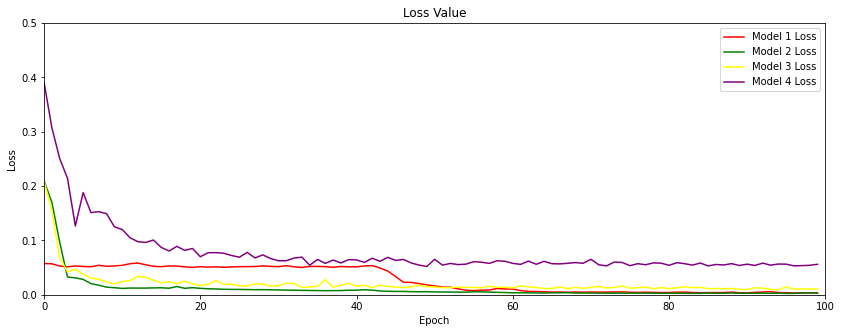

In [29]:
plt.figure(figsize=(14,5))
plt.plot(history1.history['loss'], color='red', label='Model 1 Loss')
plt.plot(history2.history['loss'], color='green', label='Model 2 Loss')
plt.plot(history3.history['loss'], color='yellow', label='Model 3 Loss')
plt.plot(history4.history['loss'], color='purple', label='Model 4 Loss')
plt.title('Loss Value')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.axis([0,100,0,0.5])
plt.legend()
plt.show()

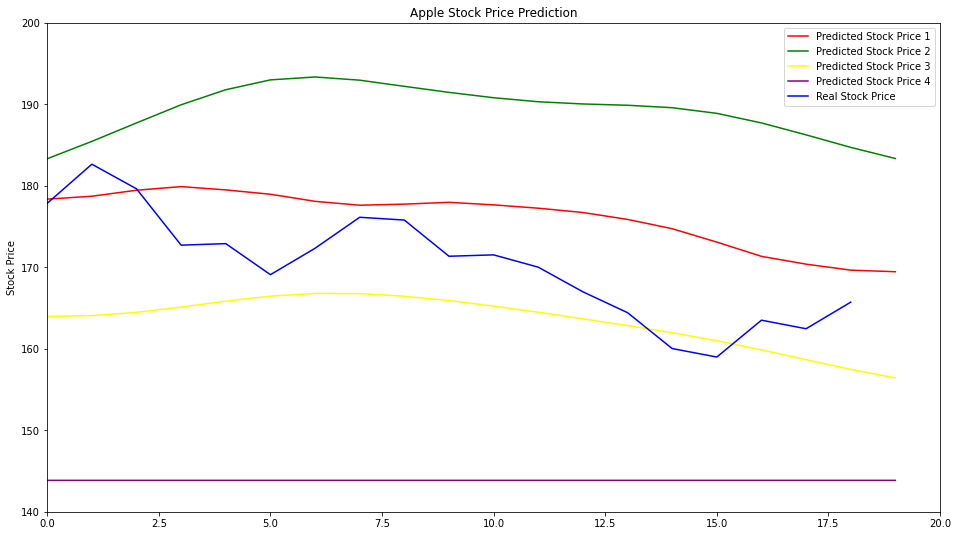

In [30]:
plt.figure(figsize=(16,9))
plt.plot(predicted_stock_price_1, color='red', label='Predicted Stock Price 1')
plt.plot(predicted_stock_price_2, color='green', label='Predicted Stock Price 2')
plt.plot(predicted_stock_price_3, color='yellow', label='Predicted Stock Price 3')
plt.plot(predicted_stock_price_4, color='purple', label='Predicted Stock Price 4')
plt.plot(real_stock_price, color='blue', label='Real Stock Price')
plt.title('Apple Stock Price Prediction')
plt.ylabel('Stock Price')
plt.axis([0,20,140,200])
plt.legend()
plt.show()